## Importing requried libraries

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Data Understanding, Cleaning and Preparation.

In [2]:
# Read the Data set
original_data_set = pd.read_csv(r'Dataset/train.csv')
original_data_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
original_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
#Check outliers in the numerical columns
original_data_set.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [5]:
# Check columns with Null values
original_data_set.columns[original_data_set.isnull().any()] 

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
# As per the dictionary, "Null" in below columns has meaning, so replacing these Nulls values with 'None'
Nan_with_None_columns = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in Nan_with_None_columns:
    original_data_set[col].fillna("None", inplace=True)

In [7]:
# Check the columns with any null values after handling the null with meaning columns.
original_data_set.columns[original_data_set.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [8]:
# Handling the rows with null values.
print(f'Shape of data set before handling Null values in rows : {original_data_set.shape}')
original_data_set.dropna(inplace=True)
print(f'Shape of data set after handling Null values in rows : {original_data_set.shape}')
# original_data_set['LotFrontage'].fillna(original_data_set["LotFrontage"].mode(), inplace=True)
# original_data_set["GarageYrBlt"].fillna(original_data_set["GarageYrBlt"].mode(), inplace=True)
# original_data_set["MasVnrArea"].fillna(original_data_set["MasVnrArea"].mode(), inplace=True)
# original_data_set["Electrical"].dropna(inplace=True)

Shape of data set before handling Null values in rows : (1460, 81)
Shape of data set after handling Null values in rows : (1120, 81)


In [9]:
# Dropping Id Column,  as it doesn't effect the target variable.
original_data_set = original_data_set.drop(['Id'], axis=1)
original_data_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


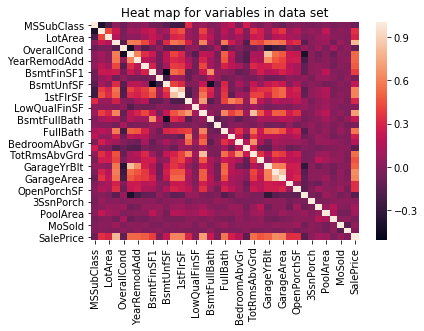

In [10]:
# checking correlation
heat_map_data = sns.heatmap(original_data_set.corr())
plt.title("Heat map for variables in data set")
plt.show()

In [11]:
# remove columns with high correlation (>0.80)
corr_matrix = original_data_set.corr().abs()
upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_corr_matrix.columns if any(upper_corr_matrix[column] > 0.80)]
print(columns_to_drop)
original_data_set = original_data_set.drop(columns_to_drop, axis=1)
original_data_set.shape

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']


(1120, 76)

In [12]:
# Seperating the numerical and categorical columns
all_columns = original_data_set.columns
numerics = ['int16', 'int32', 'int64', 'float64']
numeric_columns = original_data_set.select_dtypes(include=numerics).columns.tolist()
categorical_columns = list(set(all_columns)-set(numeric_columns))
print(f'Numeric columns in data set: {numeric_columns}')
print(f'Categorical columns in data set: {categorical_columns}')

Numeric columns in data set: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical columns in data set: ['FireplaceQu', 'LotConfig', 'MiscFeature', 'Condition1', 'RoofMatl', 'Street', 'BsmtExposure', 'SaleType', 'MSZoning', 'Functional', 'Exterior1st', 'Exterior2nd', 'LandContour', 'HouseStyle', 'Neighborhood', 'Electrical', 'ExterCond', 'GarageQual', 'Utilities', 'Alley', 'LotShape', 'SaleCondition', 'BsmtQual', 'RoofStyle', 'GarageFinish', 'LandSlope', 'GarageCond', 'GarageType', 'Fence', 'Heating', 'HeatingQC', 'CentralAir', 'PavedDrive', 'BsmtFinType2', 'Condition2', 'Founda

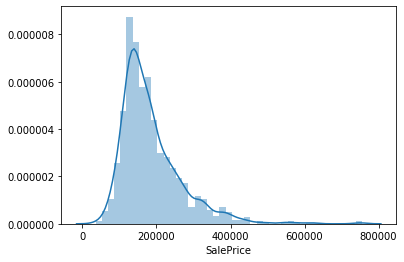

In [13]:
sns.distplot(original_data_set['SalePrice'])

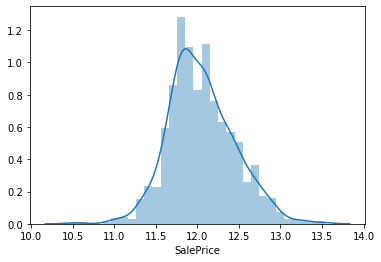

In [14]:
# Above plot indicates the target variable is left skewed which is against the assumptions of linear regression.
#Handling this by applying a log Transformation on target variable.
original_data_set['SalePrice']=np.log(original_data_set['SalePrice'])
sns.distplot(original_data_set['SalePrice'])

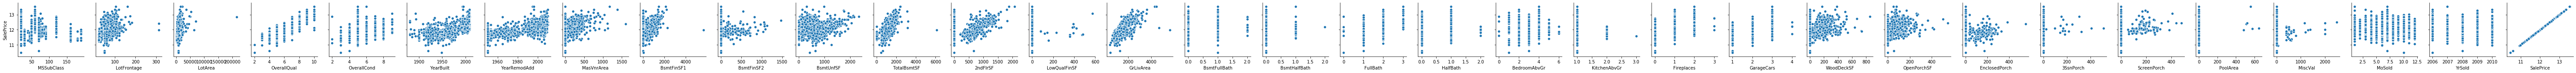

In [15]:
# print(numeric_columns)
pp_numerical = sns.pairplot(data=original_data_set,
                   y_vars=['SalePrice'],
                   x_vars=numeric_columns)
plt.show()

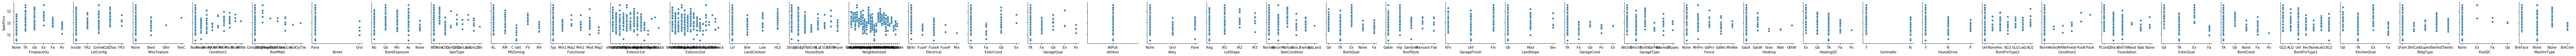

In [16]:
pp_categorical = sns.pairplot(data=original_data_set,
                   y_vars=['SalePrice'],
                   x_vars=categorical_columns)
plt.show()

In [17]:
# Check no of unique values in each column to get idea about the variance in columns.
for col in original_data_set.columns.tolist():
    print(f' {col}\n{original_data_set[col].value_counts()}')

 MSSubClass
20     422
60     228
50     116
120     66
160     53
70      52
30      47
80      37
90      35
190     19
85      14
75      13
45       9
180      6
40       3
Name: MSSubClass, dtype: int64
 MSZoning
RL         873
RM         175
FV          54
RH          10
C (all)      8
Name: MSZoning, dtype: int64
 LotFrontage
60.0     130
80.0      68
70.0      65
75.0      51
50.0      50
65.0      42
85.0      39
78.0      25
90.0      22
68.0      19
24.0      19
64.0      19
79.0      17
21.0      17
73.0      17
72.0      16
100.0     16
66.0      15
74.0      15
63.0      14
51.0      13
52.0      13
59.0      13
71.0      12
43.0      12
82.0      12
57.0      12
55.0      11
69.0      11
76.0      11
        ... 
174.0      2
129.0      2
45.0       2
114.0      2
101.0      2
313.0      2
122.0      2
109.0      2
121.0      2
115.0      2
116.0      2
118.0      2
124.0      2
111.0      1
150.0      1
149.0      1
141.0      1
140.0      1
46.0       1
152.0      1
11

Name: GarageQual, dtype: int64
 GarageCond
TA    1075
Fa      32
Po       6
Gd       5
Ex       2
Name: GarageCond, dtype: int64
 PavedDrive
Y    1046
N      51
P      23
Name: PavedDrive, dtype: int64
 WoodDeckSF
0      581
192     35
100     30
144     28
168     23
120     20
224     11
140     10
208     10
240      7
250      6
160      6
132      6
156      6
105      5
196      5
216      5
96       5
171      5
210      5
48       5
288      4
125      4
182      4
104      4
74       4
264      4
158      3
143      3
147      3
      ... 
328      1
364      1
362      1
361      1
353      1
255      1
351      1
344      1
342      1
159      1
340      1
162      1
333      1
166      1
327      1
312      1
170      1
326      1
325      1
175      1
176      1
177      1
179      1
181      1
183      1
316      1
315      1
186      1
187      1
857      1
Name: WoodDeckSF, Length: 222, dtype: int64
 OpenPorchSF
0      490
36      24
45      17
20      16
48      14
40 

In [18]:
# from the above pair plots and analysing info in value_counts of columns, we see certain columns have very less variance. which makes those columns less significant therefore dropping them.

original_data_set = original_data_set.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)
original_data_set.shape
# INtroducing new column to summarize the data of 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd' columns.
original_data_set['PropertyAge'] = (original_data_set['YrSold'] - original_data_set['YearBuilt'])
original_data_set.head()
original_data_set = original_data_set.drop(['MoSold'], axis = 1)
original_data_set = original_data_set.drop(['YrSold'], axis = 1)
original_data_set = original_data_set.drop(['YearBuilt'], axis = 1)
original_data_set = original_data_set.drop(['YearRemodAdd'], axis = 1)
original_data_set.head()
print(original_data_set.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscFeature', 'SaleType', 'SaleCondition',
       'SalePrice', 'PropertyAge'],
    

In [19]:
# creating dummies for the categorical variables
original_data_set = pd.get_dummies(original_data_set, drop_first=True )
original_data_set.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


## Model Building and Evaluation

In [20]:
# Split data set into training and test data sets
y = original_data_set.pop('SalePrice')
X = original_data_set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)
scaler = MinMaxScaler()

In [21]:
# Performing scaling on training data set.
X_train[:] = scaler.fit_transform(X_train[:])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
213,0.000000,0.075342,0.057342,0.375,0.428571,0.0000,0.126860,0.0,0.129184,0.162029,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
606,0.000000,0.208904,0.052182,0.375,0.428571,0.0000,0.129695,0.0,0.145215,0.170213,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
898,0.000000,0.270548,0.054308,0.875,0.428571,0.4750,0.387668,0.0,0.066950,0.381342,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1129,0.411765,0.133562,0.027577,0.375,0.428571,0.1125,0.165840,0.0,0.000000,0.153191,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1200,0.000000,0.171233,0.037641,0.250,0.428571,0.0000,0.000000,0.0,0.407355,0.141408,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Performing scaling on test data set.
X_test[:] = scaler.fit_transform(X_test[:])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1071,0.235294,0.410072,0.145047,0.500,0.500000,0.000000,0.142176,0.0,0.183647,0.288035,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1049,0.000000,0.280576,0.136362,0.250,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38,0.000000,0.338129,0.090358,0.375,0.666667,0.000000,0.348760,0.0,0.139555,0.418780,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
583,0.323529,0.388489,0.171103,1.000,1.000000,0.000000,0.000000,0.0,0.529538,0.490095,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
336,0.000000,0.467626,0.180614,0.875,0.333333,0.145138,0.595897,0.0,0.288099,0.761490,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# First iteration of linear regression
print(X_train.shape)
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
y_train_pred = lm_model.predict(X_train)
y_test_pred = lm_model.predict(X_test)
print(f'r2 score for train set : {r2_score(y_train, y_train_pred)}')
print(f'r2 score for test set : {r2_score(y_test, y_test_pred)}')

(784, 204)
r2 score for train set : 0.9319606116342547
r2 score for test set : -4.781803645817508e+22


In [24]:
# using RFE for feature selection in Linear regression model
rfe_model = RFE(lm_model, 100)
rfe_model = rfe_model.fit(X_train, y_train)
rfe_cols = X_train.columns[rfe_model.support_]
rfe_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'GarageCars', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PropertyAge', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR3',
       'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LandSlope_Mod', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'BldgType_2fmCon', 'BldgType_Twnhs', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'Roo

In [25]:
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]
lm_model = LinearRegression()
lm_model.fit(X_train_rfe, y_train)
y_train_pred_rfe = lm_model.predict(X_train_rfe)
y_test_pred_rfe = lm_model.predict(X_test_rfe)
print(f'r2 score for train set after rfe: {r2_score(y_train, y_train_pred_rfe)}')
print(f'r2 score for test set after rfe: {r2_score(y_test, y_test_pred_rfe)}')

r2 score for train set after rfe: 0.9170820625848279
r2 score for test set after rfe: -8.424047166800349e+22


## R2 score is too low even after applying RFE, moving now for Ridge or Lasso regression

In [26]:
# Applying Lasso Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train)
print(model_cv_lasso.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.001}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.0s finished


In [27]:
# Though alpha = 0.001 gives the lowest mean_square_error, it unable to eliminate the insignificant variables effectively, therefore in order to have a balance between variance and bais, we select alpha slightly higher than 0.001 i.e 0.005.
alpha = 0.005
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)
r2_score_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_score_test_lasso = r2_score(y_test, y_pred_test_lasso)
print(f'r2 score for train set after lasso regression: {r2_score_train_lasso}')
print(f'r2 score for test set after lasso regression: {r2_score_test_lasso}')

r2 score for train set after lasso regression: 0.8256542666910853
r2 score for test set after lasso regression: 0.789799055962569


In [28]:
# Model parameters for Lasso
model_parameters_lasso = list(lasso.coef_ )
cols = X_train.columns
model_parameters_lasso = [round(x, 2) for x in model_parameters_lasso]
list(zip(cols, model_parameters_lasso))
params_dict = list(zip(cols, model_parameters_lasso))
final_params_df = pd.DataFrame(params_dict)
final_params_df.columns = ['Variable', 'Coeff']
final_params_df = final_params_df.sort_values((['Coeff']), axis = 0, ascending = False)
print(f'lasso regression model intercept: {lasso.intercept_}\n')
print(f'Below are the lasso regression model coeffecients in descending order')
predictor_variables_lasso = pd.DataFrame(final_params_df[(final_params_df['Coeff'] != 0)])
predictor_variables_lasso

lasso regression model intercept: 11.648164413195264

Below are the lasso regression model coeffecients in descending order


,Variable,Coeff
3,OverallQual,0.66
20,GarageCars,0.29
12,GrLivArea,0.16
10,2ndFlrSF,0.08
13,BsmtFullBath,0.05
30,MSZoning_RL,0.04
130,Foundation_PConc,0.04
142,BsmtExposure_Gd,0.03
15,FullBath,0.03
196,SaleType_New,0.03


In [29]:
# Applying Ridge Regression

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_ridge.fit(X_train, y_train)
print(model_cv_ridge.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 2.0}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


In [30]:
# Setting the alpha to the optimum value and rebuilding the model.
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)
r2_score_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_score_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(f'r2 score for train set after ridge: {r2_score_train_ridge}')
print(f'r2 score for test set after ridge: {r2_score_test_ridge}')

r2 score for train set after ridge: 0.9206796193678233
r2 score for test set after ridge: 0.8751925741208658


In [31]:
# Model parameters for Lasso
model_parameters_ridge = list(ridge.coef_ )
cols = X.columns
list(zip(cols, model_parameters_ridge))
params_dict = list(zip(cols, model_parameters_ridge))
final_params_df = pd.DataFrame(params_dict)
final_params_df.columns = ['Variable', 'Coeff']
final_params_df = final_params_df.sort_values((['Coeff']), axis = 0, ascending = False)
print(f'ridge regression model intercept: {ridge.intercept_}\n')
print(f'Below are the ridge regression model coeffecients in descending order')
final_params_df

ridge regression model intercept: 11.013736660799957

Below are the ridge regression model coeffecients in descending order


,Variable,Coeff
3,OverallQual,0.397489
12,GrLivArea,0.336382
20,GarageCars,0.231617
4,OverallCond,0.201533
10,2ndFlrSF,0.195993
2,LotArea,0.171832
66,Neighborhood_StoneBr,0.157398
15,FullBath,0.153782
50,Neighborhood_Crawfor,0.148193
60,Neighborhood_NridgHt,0.145100


# Final Conclusions:

From the end results we see that for the given data set Ridge regression gave better results, but if we need a model which more simpler with fewer significant variables then lasso will be preffered choice with a slight compromise on r2 score.

### Lasso: 

R2 score on train set : 0.9206796193678233

R2 score on test set  : 0.8751925741208658

### Ridge: 

R2 score on train set : 0.8256542666910853

R2 score on test set  : 0.789799055962569

As per the Lasso regression model that we obtained below are the significant parameters 
and their corresponding coeffecient values which indicate how significant they are for 
predicting the price of the house.

In [32]:
predictor_variables_lasso

,Variable,Coeff
3,OverallQual,0.66
20,GarageCars,0.29
12,GrLivArea,0.16
10,2ndFlrSF,0.08
13,BsmtFullBath,0.05
30,MSZoning_RL,0.04
130,Foundation_PConc,0.04
142,BsmtExposure_Gd,0.03
15,FullBath,0.03
196,SaleType_New,0.03
